In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
Data = pd.read_csv('Mall_Customers.csv')

In [3]:
Data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
Data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
label_encoder = LabelEncoder()
Data['Gender'] = label_encoder.fit_transform(Data['Gender'])

E:\Anconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


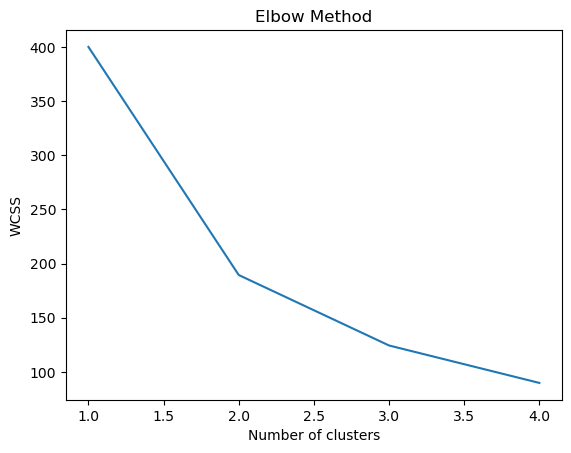

In [7]:
selected_features = Data[['Age', 'Spending Score (1-100)']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

wcss = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 5), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

E:\Anconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


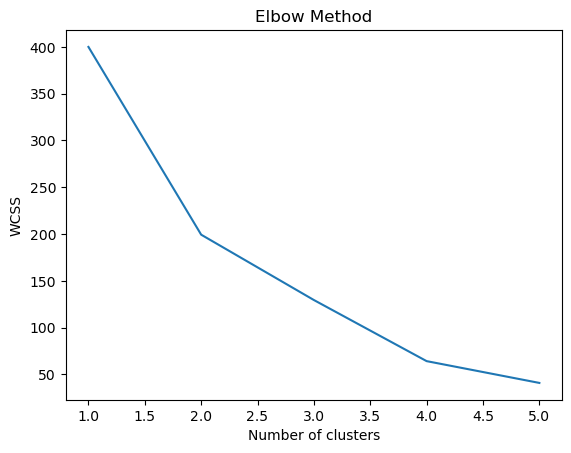

In [8]:
selected_features = Data[['Gender', 'Spending Score (1-100)']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 6), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

E:\Anconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


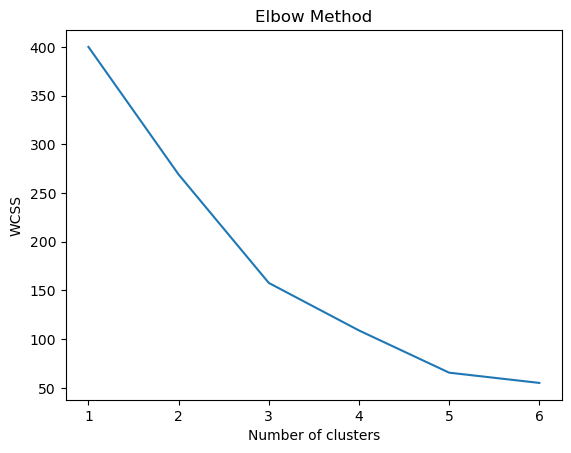

In [9]:
selected_features = Data[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 7), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  
plt.show()

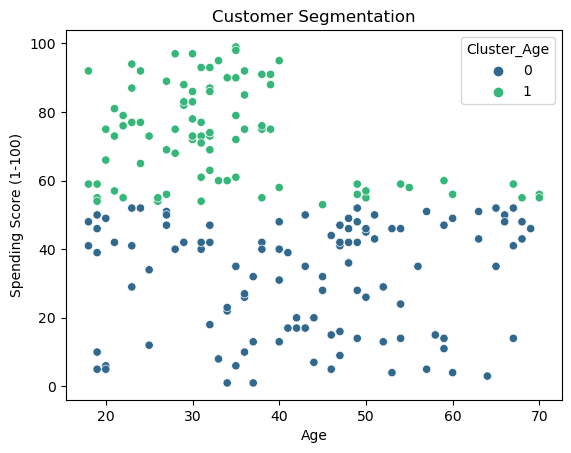

             CustomerID    Gender        Age  Annual Income (k$)  \
Cluster_Age                                                        
0             98.882883  0.432432  43.144144           60.054054   
1            102.516854  0.449438  33.494382           61.191011   

             Spending Score (1-100)  
Cluster_Age                          
0                         31.540541  
1                         73.471910  


In [10]:
optimal_clusters = 2 

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
Data['Cluster_Age'] = kmeans.fit_predict(scaled_features)

sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster_Age', data=Data, palette='viridis')
plt.title('Customer Segmentation')
plt.show()

cluster_means = Data.groupby('Cluster_Age').mean()
print(cluster_means)

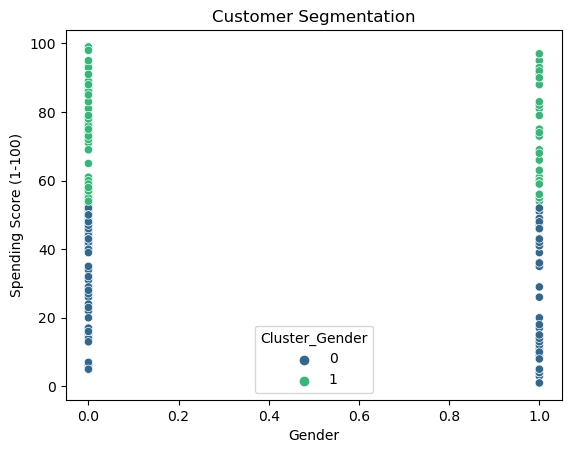

                CustomerID    Gender        Age  Annual Income (k$)  \
Cluster_Gender                                                        
0                98.882883  0.432432  43.144144           60.054054   
1               102.516854  0.449438  33.494382           61.191011   

                Spending Score (1-100)  Cluster_Age  
Cluster_Gender                                       
0                            31.540541          0.0  
1                            73.471910          1.0  


In [11]:
optimal_clusters = 2 

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
Data['Cluster_Gender'] = kmeans.fit_predict(scaled_features)

sns.scatterplot(x='Gender', y='Spending Score (1-100)', hue='Cluster_Gender', data=Data, palette='viridis')
plt.title('Customer Segmentation')
plt.show()

cluster_means = Data.groupby('Cluster_Gender').mean()
print(cluster_means)

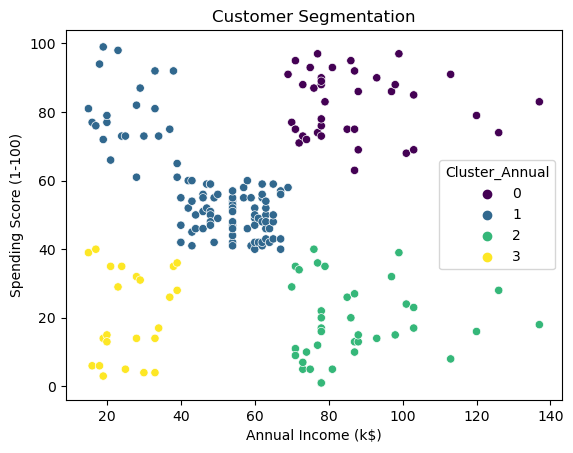

                CustomerID    Gender        Age  Annual Income (k$)  \
Cluster_Annual                                                        
0                   162.00  0.461538  32.692308           86.538462   
1                    70.97  0.410000  39.200000           48.260000   
2                   162.00  0.526316  40.394737           87.000000   
3                    23.00  0.391304  45.217391           26.304348   

                Spending Score (1-100)  Cluster_Age  Cluster_Gender  
Cluster_Annual                                                       
0                            82.128205          1.0             1.0  
1                            56.480000          0.5             0.5  
2                            18.631579          0.0             0.0  
3                            20.913043          0.0             0.0  


In [12]:
optimal_clusters = 4 

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
Data['Cluster_Annual'] = kmeans.fit_predict(scaled_features)

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_Annual', data=Data, palette='viridis')
plt.title('Customer Segmentation')
plt.show()

cluster_means = Data.groupby('Cluster_Annual').mean()
print(cluster_means)

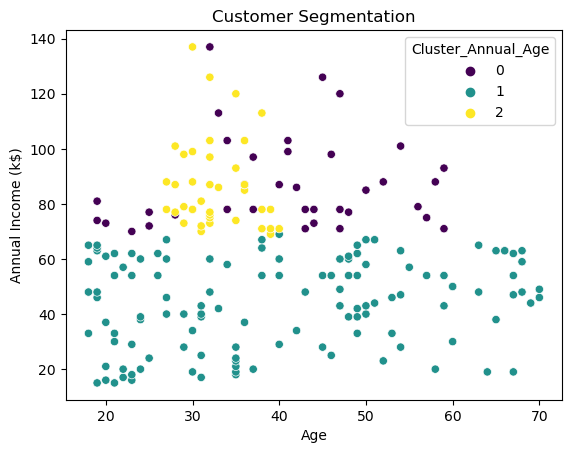

                    CustomerID    Gender        Age  Annual Income (k$)  \
Cluster_Annual_Age                                                        
0                        162.0  0.526316  40.394737           87.000000   
1                         62.0  0.406504  40.325203           44.154472   
2                        162.0  0.461538  32.692308           86.538462   

                    Spending Score (1-100)  Cluster_Age  Cluster_Gender  \
Cluster_Annual_Age                                                        
0                                18.631579     0.000000        0.000000   
1                                49.829268     0.406504        0.406504   
2                                82.128205     1.000000        1.000000   

                    Cluster_Annual  
Cluster_Annual_Age                  
0                         2.000000  
1                         1.373984  
2                         0.000000  


In [13]:
optimal_clusters = 3

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
Data['Cluster_Annual_Age'] = kmeans.fit_predict(scaled_features)

sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster_Annual_Age', data=Data, palette='viridis')
plt.title('Customer Segmentation')
plt.show()

cluster_means = Data.groupby('Cluster_Annual_Age').mean()
print(cluster_means)